# Extracting zip folder

In [1]:
!unzip '/content/Flowers-Dataset.zip'

Archive:  /content/Flowers-Dataset.zip
  inflating: flowers/daisy/15029936576_8d6f96c72c_n.jpg  
  inflating: flowers/daisy/15100730728_a450c5f422_n.jpg  
  inflating: flowers/daisy/15306268004_4680ba95e1.jpg  
  inflating: flowers/daisy/15327813273_06cdf42210.jpg  
  inflating: flowers/daisy/15760153042_a2a90e9da5_m.jpg  
  inflating: flowers/daisy/15760811380_4d686c892b_n.jpg  
  inflating: flowers/daisy/15784493690_b1858cdb2b_n.jpg  
  inflating: flowers/daisy/15813862117_dedcd1c56f_m.jpg  
  inflating: flowers/daisy/15853110333_229c439e7f.jpg  
  inflating: flowers/daisy/16020253176_60f2a6a5ca_n.jpg  
  inflating: flowers/daisy/16025261368_911703a536_n.jpg  
  inflating: flowers/daisy/16056178001_bebc2153fe_n.jpg  
  inflating: flowers/daisy/16121105382_b96251e506_m.jpg  
  inflating: flowers/daisy/16161045294_70c76ce846_n.jpg  
  inflating: flowers/daisy/16291797949_a1b1b7c2bd_n.jpg  
  inflating: flowers/daisy/16323838000_3818bce5c6_n.jpg  
  inflating: flowers/daisy/16360180712_

# Image Augmentation

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
flowers_datagram = ImageDataGenerator(rescale=1./255,
                                    zoom_range=0.2,
                                    horizontal_flip=True)

In [4]:
flowers_datagram = ImageDataGenerator(rescale=1./255)

In [12]:
xflowers = flowers_datagram.flow_from_directory('/content/flowers',
                                                target_size=(64,64),
                                                class_mode='categorical',
                                                batch_size=100)

Found 936 images belonging to 5 classes.


# Create Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense

# Add Layers

In [9]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(300,activation='relu')) # Hidden layer 1
model.add(Dense(150,activation='relu')) # Hidden layer 2
model.add(Dense(5,activation='softmax')) # Output layer

# Compile The Model

In [10]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Fit The Model

In [13]:
model.fit_generator(xflowers,
                    steps_per_epoch=len(xflowers),
                    epochs=20,
                    validation_data=xflowers,
                    validation_steps=len(xflowers),)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/20
10/10 [==============================] - 6s 444ms/step - loss: 2.3076 - accuracy: 0.2350 - val_loss: 1.6460 - val_accuracy: 0.3184
Epoch 2/20
10/10 [==============================] - 4s 417ms/step - loss: 1.4779 - accuracy: 0.3365 - val_loss: 1.3168 - val_accuracy: 0.4594
Epoch 3/20
10/10 [==============================] - 4s 420ms/step - loss: 1.2524 - accuracy: 0.4786 - val_loss: 1.1317 - val_accuracy: 0.5609
Epoch 4/20
10/10 [==============================] - 4s 418ms/step - loss: 1.0822 - accuracy: 0.5823 - val_loss: 0.9420 - val_accuracy: 0.7041
Epoch 5/20
10/10 [==============================] - 4s 418ms/step - loss: 0.8640 - accuracy: 0.7201 - val_loss: 0.6936 - val_accuracy: 0.7949
Epoch 6/20
10/10 [==============================] - 4s 423ms/step - loss: 0.6617 - accuracy: 0.7746 - val_loss: 0.4964 - val_accuracy: 0.8643
Epoch 7/20
10/10 [==============================] - 4s 418ms/step - loss: 0.4966 - accuracy: 0.8547 - val_loss: 0.4565 - val_accuracy: 0.8365
Epoch 

# Save Model

In [14]:
model.save('flowers.h5')

# Testing Model

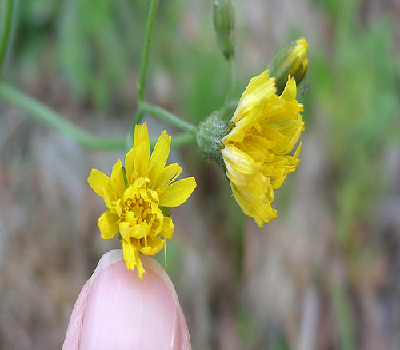

In [19]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/dandelion/13887066460_64156a9021.jpg',target_size=(350,400))
img

In [20]:
from tensorflow.keras.preprocessing import image
img = image.load_img('/content/flowers/dandelion/13887066460_64156a9021.jpg',target_size=(60,60))
x = image.img_to_array(img)
x

array([[[115., 150., 126.],
        [ 74., 127.,  45.],
        [ 91., 138., 104.],
        ...,
        [109., 105., 106.],
        [109.,  99.,  98.],
        [126., 114., 116.]],

       [[109., 150., 120.],
        [ 73., 122.,  43.],
        [ 84., 131.,  97.],
        ...,
        [107., 107., 105.],
        [115., 105., 103.],
        [117., 107., 106.]],

       [[109., 149., 115.],
        [ 68., 117.,  52.],
        [ 78., 125.,  93.],
        ...,
        [117., 120., 113.],
        [116., 119., 110.],
        [120., 113., 107.]],

       ...,

       [[106.,  97.,  92.],
        [125., 115., 113.],
        [124., 114., 113.],
        ...,
        [122., 115., 123.],
        [115., 109., 119.],
        [111., 110., 116.]],

       [[101.,  90.,  86.],
        [119., 109., 108.],
        [122., 112., 111.],
        ...,
        [128., 117., 125.],
        [118., 111., 119.],
        [120., 115., 121.]],

       [[102.,  91.,  87.],
        [111., 102.,  97.],
        [120., 1